In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


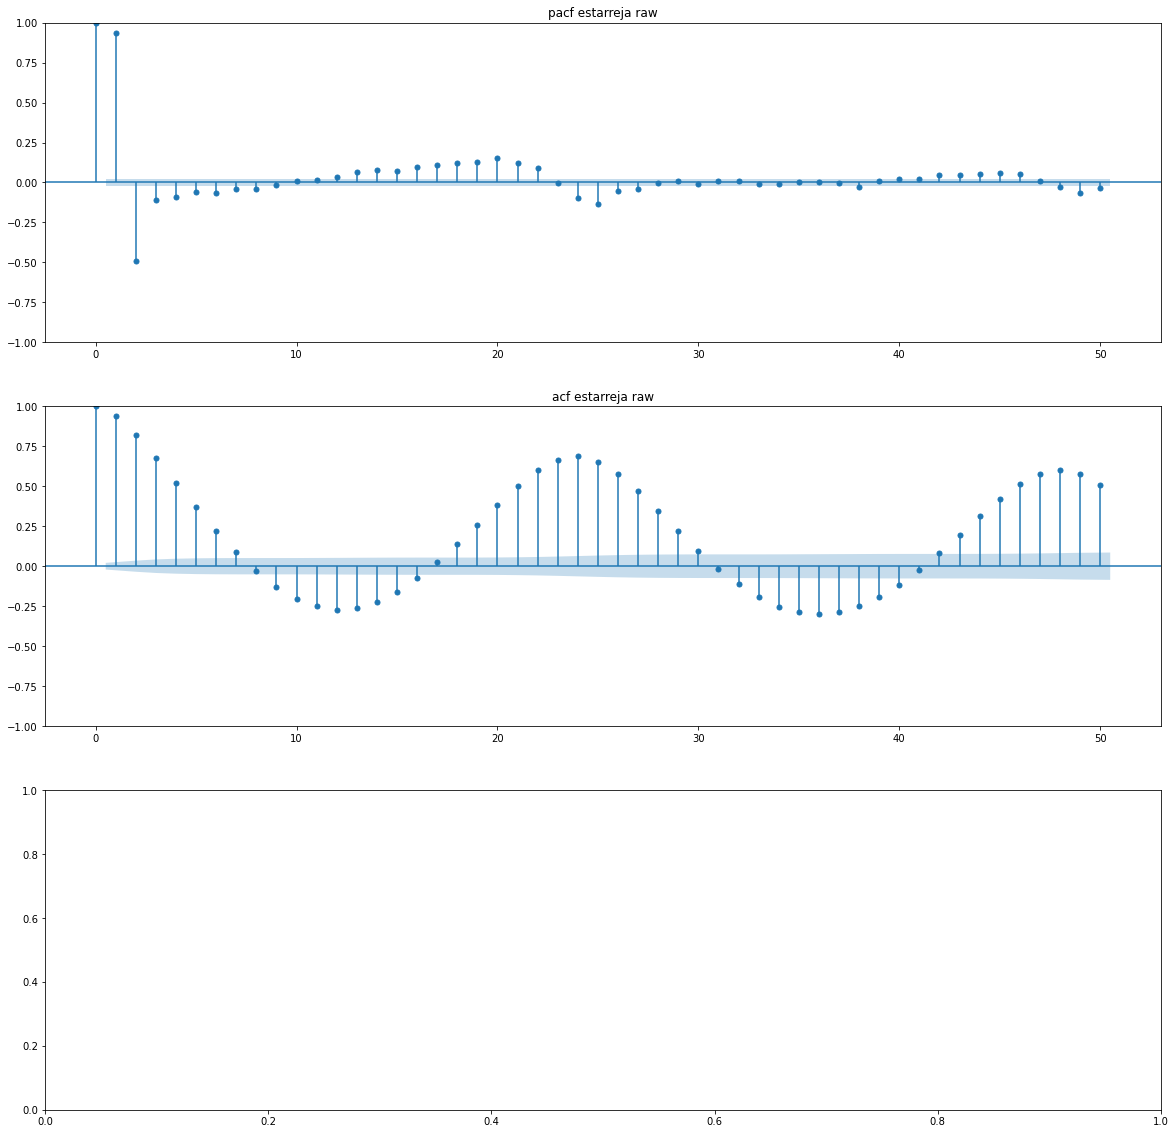

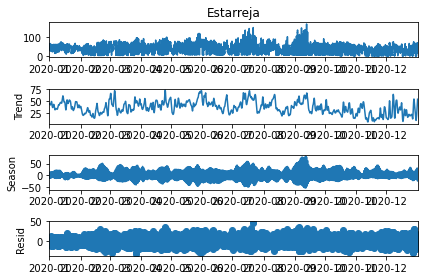

In [4]:
#entrecampos raw
estarreja = data.Estarreja

plt.figure(figsize=(20,20))

plot_pacf(estarreja, ax=plt.subplot(3, 1, 1), lags=50, title='pacf estarreja raw')
plot_acf(estarreja, ax=plt.subplot(3, 1, 2), lags=50, title='acf estarreja raw')
res = STL(estarreja).fit()

plt.subplot(3, 1, 3)
res.plot()
plt.show()

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


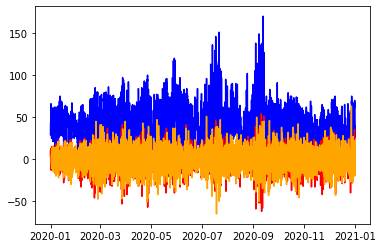

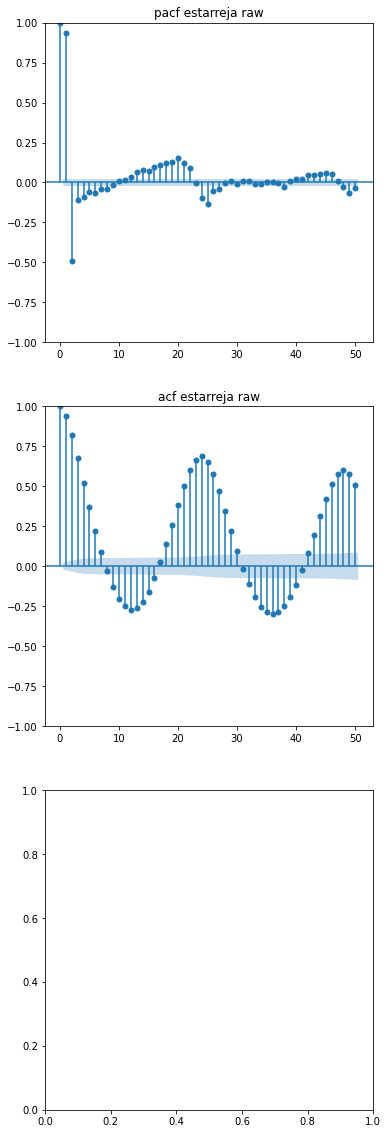

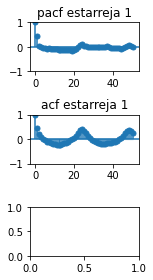

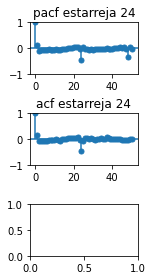

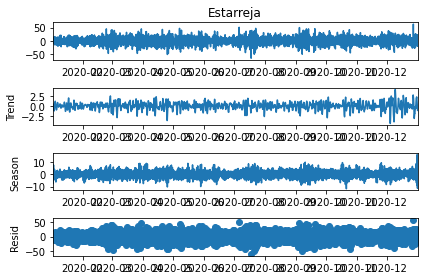

In [6]:
#estarreja differencing 1
estarreja_1 = estarreja.diff()
estarreja_1 = estarreja_1[1:]
estarreja_24 = estarreja_1.diff(24)
estarreja_24 = estarreja_24[24:]
#plt.plot(data.index, data.Estarreja, color='blue', label='raw')
#plt.plot(estarreja_1, color='red', label='diff 1')
#plt.plot(estarreja_24, color='orange', label='diff 24')

#pacf, acf plots
plt.figure(figsize=(20,20))
#estarreja
plot_pacf(estarreja, ax=plt.subplot(3, 3, 1), lags=50, title='pacf estarreja raw')
plot_acf(estarreja, ax=plt.subplot(3, 3, 4), lags=50, title='acf estarreja raw')
res = STL(estarreja).fit()
plt.subplot(3, 3, 7)
res.plot()
#estarreja diff 1
plot_pacf(estarreja_1, ax=plt.subplot(3, 3, 2), lags=50, title='pacf estarreja 1')
plot_acf(estarreja_1, ax=plt.subplot(3, 3, 5), lags=50, title='acf estarreja 1')
res = STL(estarreja_1).fit()
plt.subplot(3, 3, 8)
res.plot()
#esterreja diff 24
plot_pacf(estarreja_24, ax=plt.subplot(3, 3, 3), lags=50, title='pacf estarreja 24')
plot_acf(estarreja_24, ax=plt.subplot(3, 3, 6), lags=50, title='acf estarreja 24')
res = STL(estarreja_24).fit()
plt.subplot(3, 3, 9)
res.plot()
plt.show()